In [335]:
# 모듈 import
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Seed 고정
np.random.seed(42)

# ***1. Feature가 1개인 경우 (단순 회귀)***

*X(Feature) : 기온*

*y(Target) : 해수욕장 방문객*

In [336]:
# y = 5 * X + 20 + e
temp = 40 * np.random.rand(70, 1)
visitor = 20 + 5 * temp + 10 * np.random.randn(70, 1)

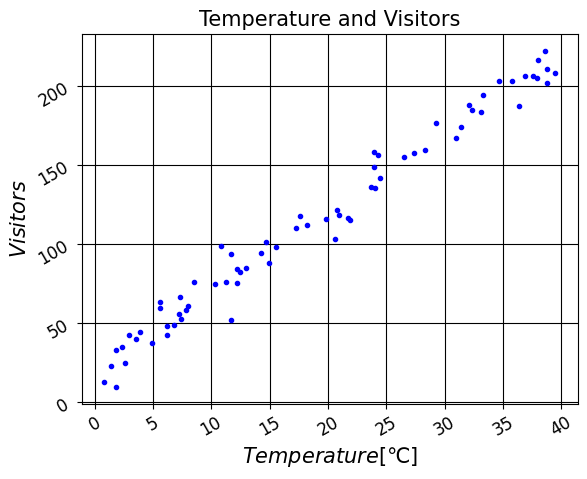

In [337]:
plt.plot(temp, visitor, "b.")
plt.title("Temperature and Visitors", fontsize=15)
plt.xlabel("$Temperature[℃]$", fontsize=15)
plt.ylabel("$Visitors$",fontsize=15)
plt.tick_params(labelrotation=30, labelsize=12)
plt.grid(color = 'black')
plt.show()

In [338]:
# 단순회귀모형 결과 확인
reg_uni = LinearRegression()
model_uni = reg_uni.fit(temp, visitor)
print('Coef :', model_uni.coef_[0][0])
print('intercept :', model_uni.intercept_[0])

Coef : 4.989319833237501
intercept : 20.444861714706818


In [339]:
X_new = 40 * np.random.rand(70, 1)
reg_uni_pred = reg_uni.predict(X_new)

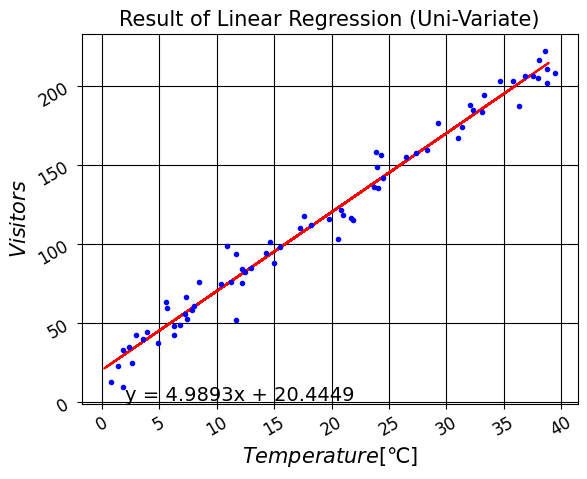

In [340]:
plt.plot(X_new, reg_uni_pred, "r-")
plt.plot(temp, visitor, "b.")
plt.title("Result of Linear Regression (Uni-Variate)", fontsize=15)
plt.xlabel("$Temperature[℃]$", fontsize=15)
plt.ylabel("$Visitors$",fontsize=15)
plt.tick_params(labelrotation=30, labelsize=12)
plt.grid(color = 'black')
plt.text(2, 1, 'y = ' + str(np.round(model_uni.coef_[0][0], 4)) + 'x + ' + str(np.round(model_uni.intercept_[0], 4)), fontsize = 14)
plt.show()

# ***2. Feature가 2개 이상인 경우 (다중 회귀)***

*X_1(Feature 1) : 나이*

*X_2(Feature 2) : BMI 지수*

*y(Target) : 평균 혈압*

In [341]:
# train set
age_train = np.random.randint(0, 90, size=60)
bmi_train = 20 + 20 * np.random.rand(60)
blood_pressure_train = 25 + 1.5 * age_train + 2 * bmi_train + 20 * np.random.rand(60)

df_health_train = pd.DataFrame({'Age': age_train, 'BMI': bmi_train, 'Blood_Pressure': blood_pressure_train})
df_health_train.head(10)

,Age,BMI,Blood_Pressure
0,20,23.885479,122.361169
1,29,21.418818,114.844242
2,27,27.935677,121.714575
3,63,21.015371,176.798030
4,68,37.732343,218.602945
5,60,20.552335,163.030757
6,47,31.577298,167.948072
7,18,28.769482,122.534439
8,3,33.440523,97.342224
9,34,26.563053,148.109021


In [342]:
# test set
age_test = np.random.randint(0, 90, size=60)
bmi_test = 20 + 20 * np.random.rand(60)
blood_pressure_test = 25 + 1.5 * age_test + 2 * bmi_test + 20 * np.random.rand(60)

df_health_test = pd.DataFrame({'Age': age_test, 'BMI': bmi_test, 'Blood_Pressure': blood_pressure_test})
df_health_test.head(10)

,Age,BMI,Blood_Pressure
0,11,21.626976,104.478166
1,54,21.696754,163.356743
2,12,39.732792,133.187510
3,22,27.485416,119.161384
4,88,27.412843,228.101586
5,29,36.255991,154.706606
6,16,38.944972,130.142282
7,61,39.720021,214.158586
8,83,35.067564,236.085872
9,88,27.525192,231.046382


In [343]:
# 다중회귀모형 결과 확인
reg_multi = LinearRegression()
model_multi = reg_multi.fit(df_health_train.iloc[:, :-1], df_health_train['Blood_Pressure'])
print('Coef :', model_multi.coef_)
print('intercept :', model_multi.intercept_)

Coef : [1.49967046 2.0342005 ]
intercept : 34.8603885108091


In [344]:
reg_multi_pred = reg_multi.predict(df_health_test.iloc[:, :-1])

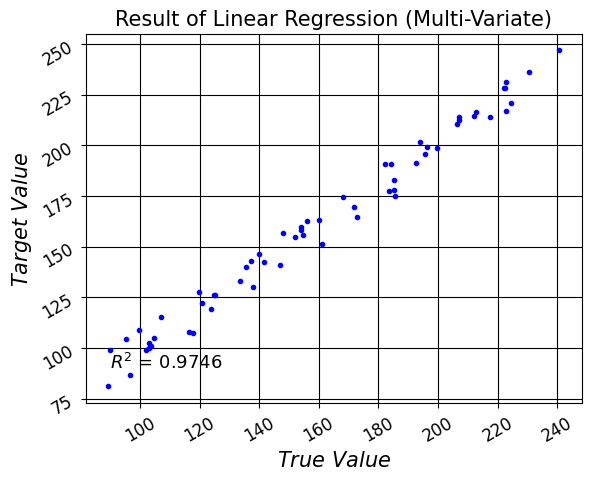

In [345]:
plt.plot(reg_multi_pred, df_health_test['Blood_Pressure'], "b.")
plt.title("Result of Linear Regression (Multi-Variate)", fontsize=15)
plt.xlabel("$True\ Value$", fontsize=15)
plt.ylabel("$Target\ Value$",fontsize=15)
plt.tick_params(labelrotation=30, labelsize=12)
plt.grid(color = 'black')
plt.text(90, 90, '$R^2$ = ' + str(np.round(model_multi.score(df_health_train.iloc[:, :-1], df_health_train['Blood_Pressure']), 4)), fontsize=13)
plt.show()